In [3]:
!python3.6 detect.py --source input --conf-thres 0.1 --output output --weights weights/best.pt

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='input', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1080 Ti', total_memory=11176MB)

Using cache found in /root/.cache/torch/hub/sarvan0506_WSL-Images_master
image 1/10 input/Z.jpg: 384x512 1 hardhats, 1 vests, 1 masks, Done. (0.172s)
image 2/10 input/img001.jpg: 320x512 2 hardhats, 2 vests, Done. (0.148s)
image 3/10 input/img002.jpg: 320x512 3 hardhats, 2 vests, Done. (0.143s)
image 4/10 input/img003.jpg: 320x512 2 hardhats, 2 vests, Done. (0.142s)
image 5/10 input/img004.jpg: 320x512 1 hardhats, 1 vests, 1 bootss, Done. (0.142s)
image 6/10 input/img005.jpg: 320x512 1 hardhats, 1 vests, Done. (0.142s)
image 7/10 input/img006.jpg: 320x512 1 hardhats, 1 vests, Done. (0.142s)
image 8/1

In [2]:
!python3.6 train.py --data data/customdata/custom.data --batch 8 --cache --cfg cfg/mde.conf --epochs 50 --img-size 512

Namespace(accumulate=4, adam=False, batch_size=8, bucket='', cache_images=True, cfg='cfg/mde.conf', data='data/customdata/custom.data', device='', epochs=50, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1080 Ti', total_memory=11176MB)

path: data/customdata/custom.data
Using cache found in /root/.cache/torch/hub/sarvan0506_WSL-Images_master
train_path:  data/customdata/train.txt
img_size 512
batch_size 8
hyp {'giou': 3.54, 'cls': 1.87, 'cls_pw': 1.0, 'obj': 64.3, 'obj_pw': 1.0, 'iou_t': 0.225, 'lr0': 0.01, 'lrf': 0.0005, 'momentum': 0.937, 'weight_decay': 0.000484, 'fl_gamma': 0.0, 'hsv_h': 0.0138, 'hsv_s': 0.678, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.0, 'shear': 0.0}
opt.rect False
opt.cache_images True
opt.single_cls False
Caching labels (3151 found, 1 missing, 38 empty, 0 dup

     40/49     9.94G      2.97      1.45     0.535      4.95        45       512
path: data/customdata/custom.data
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       318  1.59e+03     0.465     0.592     0.478     0.519

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     41/49     9.94G      2.95      1.45     0.517      4.92        39       512
path: data/customdata/custom.data
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       318  1.59e+03     0.465     0.603     0.479     0.523

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     42/49     9.94G      2.98      1.45     0.517      4.94        34       512
path: data/customdata/custom.data
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       318  1.59e+03     0.463     0.592     0.477     0.518

    

In [2]:
from model.monocular_depth_estimation_dataset import *

train_path = "data/customdata/train.txt"
img_size = 512
batch_size = 1
hyp = {'giou': 3.54, 'cls': 1.87, 'cls_pw': 1.0, 'obj': 64.3, 'obj_pw': 1.0, 'iou_t': 0.225, 'lr0': 0.01, 'lrf': 0.0005, 'momentum': 0.937, 'weight_decay': 0.000484, 'fl_gamma': 0.0, 'hsv_h': 0.0138, 'hsv_s': 0.678, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.0, 'shear': 0.0}

dataset = LoadImagesAndLabels(train_path, img_size, 1,
                              augment=False,
                              hyp=hyp,  # augmentation hyperparameters
                              rect=False,  # rectangular training
                              cache_images=True,
                              single_cls=False)

Caching labels (3151 found, 1 missing, 38 empty, 0 duplicate, for 3190 images): 100%|██████████| 3190/3190 [00:00<00:00, 9788.35it/s]
Caching images (7.2GB): 100%|██████████| 3190/3190 [00:53<00:00, 59.61it/s] 


In [3]:
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=1,
                                         num_workers=8,
                                         shuffle=True,  # Shuffle=True unless rectangular training is used
                                         pin_memory=True,
                                         collate_fn=dataset.collate_fn)

In [4]:
from IPython.display import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import time

item = None
j = 3
for i in dataloader:
    item = i
    j += 1
    if j == 1:
        break

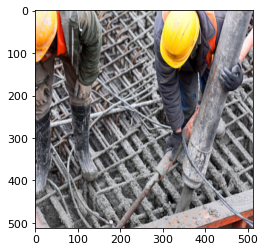

In [23]:
plt.imshow(item[0][0].permute(1, 2, 0))

In [6]:
item[1]

tensor([[0.00000, 0.00000, 0.59403, 0.06000, 0.34627, 0.10800],
        [0.00000, 1.00000, 0.73134, 0.39800, 0.51940, 0.52400]])

In [7]:
item[2]

['./data/customdata/images/img19.jpg']

In [8]:
item[3]

[[[500, 335], [[1.0, 1.0], [0.0, 0.0]]]]

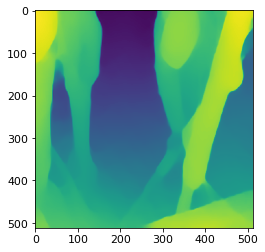

In [22]:
plt.imshow(item[4][0].permute(1, 2, 0))

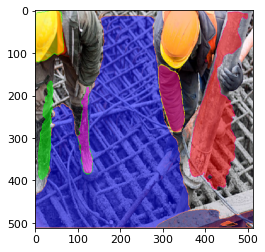

In [21]:
plt.imshow(item[5][0].permute(1, 2, 0))

In [ ]:
!python3.6 train.py --data data/customdata/custom.data --weights model-f46da743.pt --batch 8 --cache --cfg cfg/mde.conf --epochs 50 --img-size 512

In [6]:
item[0][0].shape

torch.Size([3, 512, 512])

In [27]:
import matplotlib.pyplot as plt
def showimg(a):
    if len(a.shape) == 2:
        plt.matshow(a)
    else:
        plt.imshow(  a.permute(1, 2, 0)  )

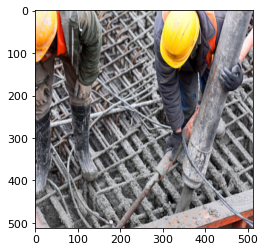

In [31]:
showimg(item[0][0])

In [26]:
item[4][0][0].shape

torch.Size([512, 512])